In [1]:
from preprocess.preprocess import *
import PARAMETERS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from confusion_matrix_pretty_print import print_confusion_matrix

%matplotlib inline

In [2]:
PARAMETERS.LBP_METHOD = 'default'
PARAMETERS.METHOD = 'get_pyramid_dataset'
PARAMETERS.INTERPOLATION_ALGORITHM = 'lanczos'
PARAMETERS.BALANCE = False
PARAMETERS.N_SCALES = 5
PARAMETERS.GRAY_INTENSITY = True
PARAMETERS.X2SCALE = True
PARAMETERS.FILE_EXTENSION = PARAMETERS.update_file_extension(PARAMETERS)
PARAMETERS.PLOT = False

pd.DataFrame({k: getattr(PARAMETERS, k) for k in VALID_PARAMETERS.keys()}, index=['Parameters']).head()

,LBP_METHOD,METHOD,INTERPOLATION_ALGORITHM,BALANCE,N_SCALES,GRAY_INTENSITY,X2SCALE
Parameters,default,get_pyramid_dataset,lanczos,False,5,True,True


In [3]:
from create_db import main

PARAMETERS.CHANNEL = 0

main()

In [4]:
PARAMETERS.CHANNEL = 1

main()

In [5]:
PARAMETERS.CHANNEL = 2

main()

In [6]:
from main import main, load_datasets_for_lbp_operator

def get_channel_features():
    df_train = pd.DataFrame()
    df_test = pd.DataFrame()
    channels_map = {0: 'red', 1: 'green', 2: 'blue'}
    for channel in range(3):
        PARAMETERS.CHANNEL = channel
        df_train_temp, df_test_temp, _, __ = load_datasets_for_lbp_operator('../')
        df_train_temp.columns = [f"{channels_map[PARAMETERS.CHANNEL]}_{c}" for c in df_train_temp.columns]
        df_test_temp.columns = [f"{channels_map[PARAMETERS.CHANNEL]}_{c}" for c in df_test_temp.columns]
        df_train = pd.concat([df_train, df_train_temp], axis=1)
        df_test = pd.concat([df_test, df_test_temp], axis=1)
    PARAMETERS.CHANNEL = None
    return df_train, df_test

df_train, df_test = get_channel_features()

In [7]:
df_train

,red_Original,red_default_1:1,red_default_1:2,red_default_1:4,red_default_1:8,red_default_2:1_1,red_default_2:1_2,red_default_2:1_3,red_default_2:1_4,green_Original,...,green_default_2:1_4,blue_Original,blue_default_1:1,blue_default_1:2,blue_default_1:4,blue_default_1:8,blue_default_2:1_1,blue_default_2:1_2,blue_default_2:1_3,blue_default_2:1_4
0,2,225,225,225,225,225,225,225,225,0,...,225,1,193,225,225,225,129,1,199,7
1,3,225,225,225,225,224,240,224,241,0,...,240,1,224,225,225,225,0,17,30,30
2,3,225,225,225,225,241,241,225,225,0,...,225,0,240,225,225,225,0,16,255,239
3,3,224,225,225,225,241,225,225,224,0,...,225,0,241,225,225,225,16,240,255,225
4,3,240,224,225,225,225,224,240,240,0,...,240,0,225,225,225,225,241,241,241,240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226537,2,30,30,30,30,30,30,30,30,0,...,30,0,15,207,15,30,241,241,255,255
226538,2,30,30,30,30,30,31,30,30,0,...,255,0,31,207,15,30,241,241,255,255
226539,2,30,30,30,30,14,30,30,30,0,...,31,0,31,254,31,30,241,241,255,255
226540,1,30,30,30,30,30,30,30,30,0,...,30,0,30,254,31,30,245,241,255,255


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020754 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


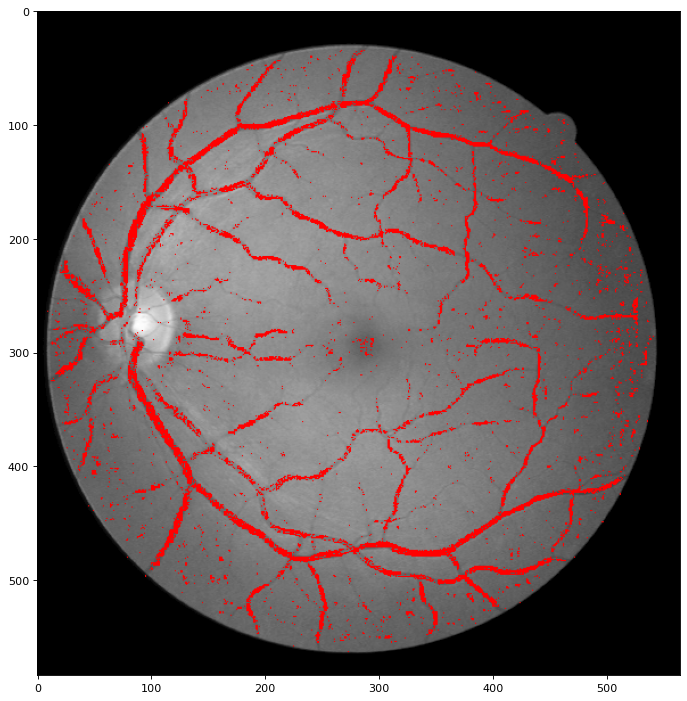

Accuracy score: 0.9072463853198083

F1 score: 0.5528685943922853

Confusion matrix:

     t/p      0     1 
        0 1158168 29377 
        1 97019 78143 
Sensivity: 0.44611845034882
Specificity: 0.9752624111086317


(0.907, 0.553, 1158168, 29377, 97019, 78143)

In [8]:
PARAMETERS.PLOT = True

main(lgb='Num', plot_once=True)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.325028 seconds.
You can set `force_col_wise=true` to remove the overhead.


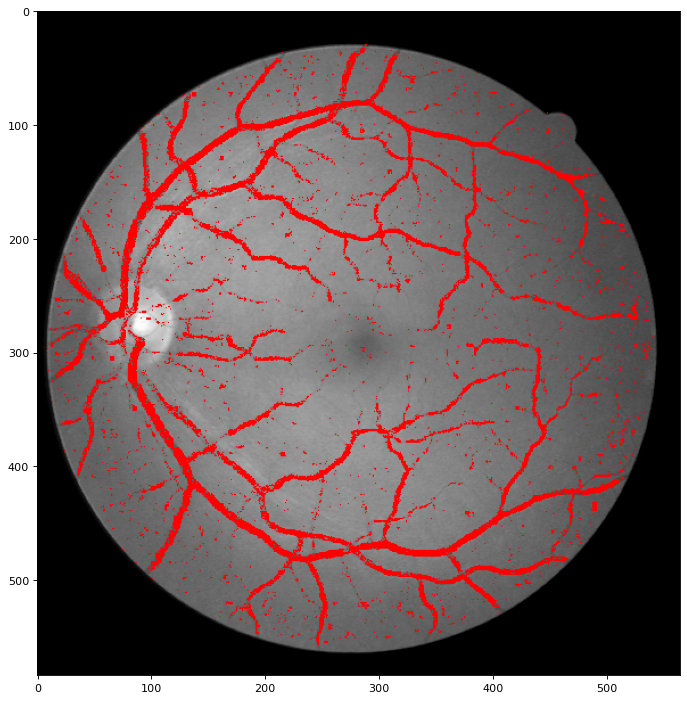

Accuracy score: 0.9185099951787141

F1 score: 0.6447644121419958

Confusion matrix:

     t/p      0     1 
        0 1150883 36662 
        1 74385 100777 
Sensivity: 0.5753359746977084
Specificity: 0.9691279067319554


(0.919, 0.645, 1150883, 36662, 74385, 100777)

In [9]:
main(lgb='Num', plot_once=True, add_channels=True)